# Plot the Evolution of the Radio-Loud Fraction with Redshift

In [1]:
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

## Combine Data Tables
Combine our data with literature data at lower redshifts.

In [2]:
literature_table = pd.read_csv("../tables/qso_rl_lit.csv", delimiter=",")
obs_table = pd.read_csv("../tables/table2.csv", delimiter=",")

det_names = ["QSO-J0100+2802", "QSO-J0818+1722", "QSO-J1034-1425", "QSO-J1429+5447", "QSO-J1558-0724", "QSO-J1602+4228", "QSO-J2318-3113"]

obs_names = obs_table.iloc[:, 0]
z_list = obs_table.iloc[:, 1]
R = obs_table.iloc[:, -3]
R_err = obs_table.iloc[:, -2]
R_ul = obs_table.iloc[:, -1]
M = obs_table.iloc[:, 6]

for i, name in enumerate(obs_names):
    # check that qso is not already in the list and is not the radio selected quasar J1427+3312
    if not name[4:] in literature_table.iloc[:, 0].values and name != "QSO-J1427+3312":
        # detected quasar
        if name in det_names:
            df = pd.DataFrame([{"name": name[4:], "z": z_list[i], "M": M[i], "R": R[i], "Rerr": R_err[i], "Ref": "This Work"},])
        # upper limit
        else:
            df = pd.DataFrame([{"name": name[4:], "z": z_list[i], "M": M[i], "R": R_ul[i], "Rerr": "-", "Ref": "This Work"},])

        literature_table = pd.concat([literature_table, df], ignore_index=True, axis=0)

literature_table.to_csv("../tables/qso_rl_combined.csv")
table = pd.read_csv("../tables/qso_rl_combined.csv", delimiter=",")

## KM-Estimation

5.63
-26.11


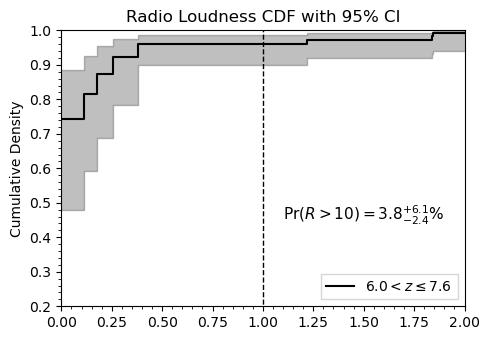

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), sharex=True, sharey=True)

# low redshift bin
zmin=5
zmax=6.0
idx = np.where((table["z"].astype(float) >= zmin) & (table["z"].astype(float) < zmax))[0]

logR = np.log10(table["R"].astype(float))[idx]
E = np.zeros_like(logR)
E[table["Rerr"][idx] != "-"] = 1

kmf = KaplanMeierFitter()
res = kmf.fit_left_censoring(logR, E)

idx = np.argmin(np.abs(kmf.cumulative_density_['KM_estimate'].index - 1.0))
km, kml, kmu = (kmf.cumulative_density_['KM_estimate'].values[idx], kmf.confidence_interval_cumulative_density_['KM_estimate_lower_0.95'].values[idx], kmf.confidence_interval_cumulative_density_['KM_estimate_upper_0.95'].values[idx])

rlf = (1 - km) * 100
rlfu = np.abs(km - kml) * 100
rlfl = np.abs(km - kmu) * 100

ax = kmf.plot_cumulative_density(label=r"$5.6 \leq z < 6.0$ (Literature)", color="lightskyblue", xlabel=r"", ylabel=r"Cumulative Density", ax=ax)
ax.text(1.1, 0.55, r"$\mathrm{Pr}(R>10)={%.1f}^{+%.1f}_{-%.1f} %s$" % (rlf.round(1), rlfu.round(1), rlfl.round(1), "\%"), fontsize=11, color="lightskyblue")

# high redshift bin
zmin=6.0
zmax=7.6
idx = np.where((table["z"].astype(float) > zmin) & (table["z"].astype(float) <= zmax))[0]

logR = np.log10(table["R"].astype(float))[idx]
E = np.zeros_like(logR)
E[table["Rerr"][idx] != "-"] = 1
kmf = KaplanMeierFitter()
res = kmf.fit_left_censoring(logR, E)

idx = np.argmin(np.abs(kmf.cumulative_density_['KM_estimate'].index - 1.0))
km, kml, kmu = (kmf.cumulative_density_['KM_estimate'].values[idx], kmf.confidence_interval_cumulative_density_['KM_estimate_lower_0.95'].values[idx], kmf.confidence_interval_cumulative_density_['KM_estimate_upper_0.95'].values[idx])

rlf = (1 - km) * 100
rlfu = np.abs(km - kml) * 100
rlfl = np.abs(km - kmu) * 100

ax = kmf.plot_cumulative_density(label=r"$6.0 < z < 7.6$", color="k", xlabel=r"", ylabel=r"Cumulative Density", ax=ax)
ax.text(1.1, 0.45, r"$\mathrm{Pr}(R>10)={%.1f}^{+%.1f}_{-%.1f} %s$" % (rlf.round(1), rlfu.round(1), rlfl.round(1), "\%"), fontsize=11)
ax.set_xlim([0.0, 2.0])
ax.set_ylim([0.2, 1.0])
ax.minorticks_on()
ax.legend(fancybox=False, loc=4)
ax.vlines(1, 0, 1, linestyle="--", color="k", linewidth=1, label=r"$R=10$")
ax.set_title("Radio Loudness CDF with 95% CI")

plt.tight_layout()
#plt.savefig("../../plots/kmr.pdf")

## Plot RLF vs redshift

/tmp/ipykernel_143201/3002799523.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(6.15, rlf_list[i], xerr=[[0.15,], [1.35]], yerr=[[rlf_lerr_list[i],], [rlf_uerr_list[i],]], fmt=".", label=label[i], marker=markers[i], color=colors[i], markersize=6, capsize=2, capthick=.5, elinewidth=.5)
/tmp/ipykernel_143201/3002799523.py:31: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.errorbar(np.mean(z_list[i]), rlf_list[i], xerr=(z_list[i][1]-z_list[i][0])/2, yerr=[[rlf_lerr_list[i],], [rlf_uerr_list[i],]], fmt=".", label=label[i], marker=markers[i], color=colors[i], markersize=6, capsize=2, capthick=.5, elinewidth=.5)


0.39308342678797675 0.07965593062805117 8.582768456977552


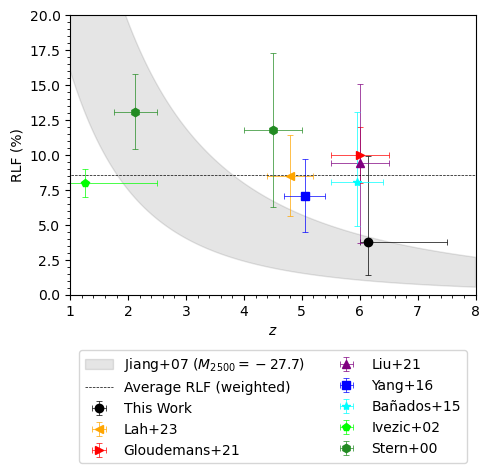

In [11]:
# make RLF lists using literature values
label = ["This Work", "Lah+23", "Gloudemans+21", "Liu+21", "Yang+16", "Bañados+15", "Ivezic+02", "Stern+00", None]
z_list = [[6.0, 7.6], [4.4, 5.2], [5.5, 6.5], [5.5, 6.5], [4.7, 5.4], [5.5, 6.4], [0.0, 2.5], [1.75, 2.5], [4.0, 5.0]]
rlf_list = [3.8, 8.5, 10, 9.4, 7.1, 8.1, 8.0, 13.1, 11.8]
rlf_uerr_list = [6.1, 2.9, 2, 5.7, 2.6, 5.0, 1.0, 2.7, 5.5]
rlf_lerr_list = [2.4, 2.9, 2, 5.7, 2.6, 3.2, 1.0, 2.7, 5.5]
rlf_err_list = 0.5 * (np.array(rlf_uerr_list) + np.array(rlf_lerr_list))
rlf_mean = np.sum(np.array(rlf_list) / rlf_err_list**2) / np.sum(1 / rlf_err_list**2)
colors = ["k", "orange", "red", "purple", "blue", "cyan", "lime", "forestgreen", "forestgreen"]
markers = ["o", "<", ">", "^", "s", "*", "p", "h", "h"]

# the parameters for the fitted RLF vs redsfhit function in Jiang+07
b0 = -0.132
b0_err = 0.116
bz = -2.052
bz_err = 0.261
bM = -0.183
bM_err = 0.025
M2500 = -26
M2500_err = 1.7

# create the fitted RLF vs redsfhit function from Jiang+07
f_jiang = lambda z: b0 + bz * np.log10(1+z) + bM * (M2500 + 26)
err_jiang = lambda z: np.sqrt(b0_err**2 + bz_err**2 * np.log(1+z)**2 + bM_err**2 * (M2500 + 26)**2 + bM**2 * M2500_err**2)
rlf_jiang = lambda z: 10**(f_jiang(z)) / (1 + 10**(f_jiang(z)))
rlf_err_jiang = lambda z: err_jiang(z) * np.sqrt(rlf_jiang(z)**2 + rlf_jiang(z)**4)

# scatter plot of RLFs
fig = plt.figure(figsize=(5, 5))
for i in range(9):
    if i == 0:
        plt.errorbar(6.15, rlf_list[i], xerr=[[0.15,], [1.35]], yerr=[[rlf_lerr_list[i],], [rlf_uerr_list[i],]], fmt=".", label=label[i], marker=markers[i], color=colors[i], markersize=6, capsize=2, capthick=.5, elinewidth=.5)
    else:
        plt.errorbar(np.mean(z_list[i]), rlf_list[i], xerr=(z_list[i][1]-z_list[i][0])/2, yerr=[[rlf_lerr_list[i],], [rlf_uerr_list[i],]], fmt=".", label=label[i], marker=markers[i], color=colors[i], markersize=6, capsize=2, capthick=.5, elinewidth=.5)

# plot RLF vs redshift bands as predicted by Jiang+07 for M2500=-27.665
M2500 = -27.665
z_range = np.linspace(0.0, 8, 1000)
plt.fill_between(z_range, (rlf_jiang(z_range) - rlf_err_jiang(z_range))*100, (rlf_jiang(z_range) + rlf_err_jiang(z_range))*100, color="k", alpha=0.1, label=r"Jiang+07 ($M_{2500}=-27.7$)")
plt.hlines(rlf_mean, 0, 8, linestyle="--", color="k", linewidth=0.5, label="Average RLF (weighted)")

# format plot and save
plt.xlabel(r"$z$")
plt.ylabel("RLF (%)")
plt.xlim(1.0, 8.0)
plt.ylim(0, 20)
plt.minorticks_on()
plt.legend(bbox_to_anchor=(0.5, -0.4), loc="center", ncols=2)
plt.tight_layout()
fig.subplots_adjust(bottom=0.4)
plt.savefig("../../plots/rlf_z.pdf")

print("RLF at z=0.5, M2500=-27.665: ", rlf_jiang(0.5))
print("RLF at z=3, M2500=-27.665: ", rlf_jiang(3))
print("Mean RLF: ", rlf_mean)